# 官方教程 - 10分钟入门pandas

> 教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)，有删改，[点击直达最新文档地址](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

```{admonition} 在线刷题
:class: seealso

检查 or 强化 `Pandas` 数据分析操作？<a href="https://www.heywhale.com/mw/project/6146c0318447b8001769ff20" target="_blank">👉在线体验「Pandas进阶修炼300题」</a>
```

```{note} 
本页面代码可以[在线编辑、执行](../指引/在线执行.md)！

首先导入 Python 数据处理中常用的三个库，如果没有需要提前使用 `pip` 安装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

注：本教程基于Pandas0.18.0版本，因版本不同可能有些代码无法成功执行，请自行查阅解决办法

## 创建数据

使用pd.Series创建Series对象

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过numpy的array数据来创建DataFrame对象

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,1.506958,-0.714350,0.228595,1.291258
2013-01-02,0.952267,-0.902719,0.093593,-0.522960
2013-01-03,-0.545919,-1.297832,-0.393322,-0.412880
2013-01-04,-0.704600,-0.626452,0.824661,-1.012147
2013-01-05,1.948821,-1.912264,-0.886892,0.345378
2013-01-06,0.336011,-1.073881,1.208655,0.812132


通过字典创建DataFrame对象

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
dir(df2)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '_

## 数据查看

基本方法，务必掌握，更多相关查看数据的方法可以参与[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics)

下面分别是查看数据的顶部和尾部的方法

In [12]:
df.head()

,A,B,C,D
2013-01-01,1.506958,-0.714350,0.228595,1.291258
2013-01-02,0.952267,-0.902719,0.093593,-0.522960
2013-01-03,-0.545919,-1.297832,-0.393322,-0.412880
2013-01-04,-0.704600,-0.626452,0.824661,-1.012147
2013-01-05,1.948821,-1.912264,-0.886892,0.345378


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.704600,-0.626452,0.824661,-1.012147
2013-01-05,1.948821,-1.912264,-0.886892,0.345378
2013-01-06,0.336011,-1.073881,1.208655,0.812132


查看DataFrame对象的索引，列名，数据信息

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 1.50695846, -0.71434975,  0.2285954 ,  1.29125845],
       [ 0.95226667, -0.90271926,  0.09359288, -0.52295967],
       [-0.54591869, -1.29783216, -0.39332151, -0.41287995],
       [-0.70460028, -0.62645225,  0.82466132, -1.01214717],
       [ 1.94882145, -1.91226434, -0.88689177,  0.34537812],
       [ 0.33601079, -1.07388098,  1.20865484,  0.8121317 ]])

描述性统计

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.582256,-1.087916,0.179215,0.083464
std,1.081563,0.471298,0.768179,0.880090
min,-0.704600,-1.912264,-0.886892,-1.012147
25%,-0.325436,-1.241844,-0.271593,-0.495440
50%,0.644139,-0.988300,0.161094,-0.033751
75%,1.368286,-0.761442,0.675645,0.695443
max,1.948821,-0.626452,1.208655,1.291258


数据转置

In [18]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.506958,0.952267,-0.545919,-0.704600,1.948821,0.336011
B,-0.714350,-0.902719,-1.297832,-0.626452,-1.912264,-1.073881
C,0.228595,0.093593,-0.393322,0.824661,-0.886892,1.208655
D,1.291258,-0.522960,-0.412880,-1.012147,0.345378,0.812132


根据列名排序

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.291258,0.228595,-0.714350,1.506958
2013-01-02,-0.522960,0.093593,-0.902719,0.952267
2013-01-03,-0.412880,-0.393322,-1.297832,-0.545919
2013-01-04,-1.012147,0.824661,-0.626452,-0.704600
2013-01-05,0.345378,-0.886892,-1.912264,1.948821
2013-01-06,0.812132,1.208655,-1.073881,0.336011


根据B列数值排序

In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,1.948821,-1.912264,-0.886892,0.345378
2013-01-03,-0.545919,-1.297832,-0.393322,-0.412880
2013-01-06,0.336011,-1.073881,1.208655,0.812132
2013-01-02,0.952267,-0.902719,0.093593,-0.522960
2013-01-01,1.506958,-0.714350,0.228595,1.291258
2013-01-04,-0.704600,-0.626452,0.824661,-1.012147


## 数据选取

官方建议使用优化的熊猫数据访问方法`.at，.iat，.loc`和`.iloc`，部分较早的pandas版本可以使用`.ix`

这些选取函数的使用需要熟练掌握，我也曾写过相关文章帮助理解

- [5分钟学会Pandas中iloc/loc/ix区别](https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw)

### 使用\[\]选取数据

选取单列数据，等效于`df.A`:

In [21]:
df['A']

2013-01-01    1.506958
2013-01-02    0.952267
2013-01-03   -0.545919
2013-01-04   -0.704600
2013-01-05    1.948821
2013-01-06    0.336011
Freq: D, Name: A, dtype: float64

按行选取数据，使用[]

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,1.506958,-0.714350,0.228595,1.291258
2013-01-02,0.952267,-0.902719,0.093593,-0.522960
2013-01-03,-0.545919,-1.297832,-0.393322,-0.412880


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.952267,-0.902719,0.093593,-0.522960
2013-01-03,-0.545919,-1.297832,-0.393322,-0.412880
2013-01-04,-0.704600,-0.626452,0.824661,-1.012147


### 通过标签选取数据

In [24]:
df.loc[dates[0]]

A    1.506958
B   -0.714350
C    0.228595
D    1.291258
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.506958,-0.714350
2013-01-02,0.952267,-0.902719
2013-01-03,-0.545919,-1.297832
2013-01-04,-0.704600,-0.626452
2013-01-05,1.948821,-1.912264
2013-01-06,0.336011,-1.073881


In [26]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.952267,-0.902719
2013-01-03,-0.545919,-1.297832
2013-01-04,-0.704600,-0.626452


In [27]:
df.loc['20130102',['A','B']]

A    0.952267
B   -0.902719
Name: 2013-01-02 00:00:00, dtype: float64

In [28]:
df.loc[dates[0],'A']

1.5069584601311365

In [29]:
df.at[dates[0],'A']

1.5069584601311365

### 通过位置选取数据

In [30]:
df.iloc[3]

A   -0.704600
B   -0.626452
C    0.824661
D   -1.012147
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.704600,-0.626452
2013-01-05,1.948821,-1.912264


In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.952267,0.093593
2013-01-03,-0.545919,-0.393322
2013-01-05,1.948821,-0.886892


In [33]:
df.iloc[1:3]

,A,B,C,D
2013-01-02,0.952267,-0.902719,0.093593,-0.52296
2013-01-03,-0.545919,-1.297832,-0.393322,-0.41288


In [34]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.714350,0.228595
2013-01-02,-0.902719,0.093593
2013-01-03,-1.297832,-0.393322
2013-01-04,-0.626452,0.824661
2013-01-05,-1.912264,-0.886892
2013-01-06,-1.073881,1.208655


In [35]:
df.iloc[1, 1]

-0.9027192552415536

In [36]:
df.iat[1, 1]

-0.9027192552415536

### 使用布尔索引 

In [37]:
df[df.A>0]

,A,B,C,D
2013-01-01,1.506958,-0.714350,0.228595,1.291258
2013-01-02,0.952267,-0.902719,0.093593,-0.522960
2013-01-05,1.948821,-1.912264,-0.886892,0.345378
2013-01-06,0.336011,-1.073881,1.208655,0.812132


In [38]:
df[df>0]

,A,B,C,D
2013-01-01,1.506958,NaN,0.228595,1.291258
2013-01-02,0.952267,NaN,0.093593,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,0.824661,NaN
2013-01-05,1.948821,NaN,NaN,0.345378
2013-01-06,0.336011,NaN,1.208655,0.812132


In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one', 'one','two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,1.506958,-0.714350,0.228595,1.291258,one
2013-01-02,0.952267,-0.902719,0.093593,-0.522960,one
2013-01-03,-0.545919,-1.297832,-0.393322,-0.412880,two
2013-01-04,-0.704600,-0.626452,0.824661,-1.012147,three
2013-01-05,1.948821,-1.912264,-0.886892,0.345378,four
2013-01-06,0.336011,-1.073881,1.208655,0.812132,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.545919,-1.297832,-0.393322,-0.412880,two
2013-01-05,1.948821,-1.912264,-0.886892,0.345378,four


## 缺失值处理

**reindex**

Pandas中使用`np.nan`来表示缺失值，可以使用`reindex`更改/添加/删除指定轴上的索引

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [44]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [45]:
df1

,A,B,C,D,E
2013-01-01,1.506958,-0.714350,0.228595,1.291258,1.0
2013-01-02,0.952267,-0.902719,0.093593,-0.522960,1.0
2013-01-03,-0.545919,-1.297832,-0.393322,-0.412880,NaN
2013-01-04,-0.704600,-0.626452,0.824661,-1.012147,NaN


### 删除缺失值
舍弃含有NaN的行

In [46]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,1.506958,-0.714350,0.228595,1.291258,1.0
2013-01-02,0.952267,-0.902719,0.093593,-0.522960,1.0


### 填充缺失值
填充缺失数据

In [47]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.506958,-0.714350,0.228595,1.291258,1.0
2013-01-02,0.952267,-0.902719,0.093593,-0.522960,1.0
2013-01-03,-0.545919,-1.297832,-0.393322,-0.412880,5.0
2013-01-04,-0.704600,-0.626452,0.824661,-1.012147,5.0


In [48]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## 常用操作

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于Pandas常用操作介绍！

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！

### 统计

在进行统计操作时需要排除缺失值！

**描述性统计👇**

纵向求均值

In [49]:
df.mean()

A    0.582256
B   -1.087916
C    0.179215
D    0.083464
dtype: float64

横向求均值

In [50]:
df.mean(1)

2013-01-01    0.578116
2013-01-02   -0.094955
2013-01-03   -0.662488
2013-01-04   -0.379635
2013-01-05   -0.126239
2013-01-06    0.320729
Freq: D, dtype: float64

In [51]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [52]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.545919,-2.297832,-1.393322,-1.412880
2013-01-04,-3.704600,-3.626452,-2.175339,-4.012147
2013-01-05,-3.051179,-6.912264,-5.886892,-4.654622
2013-01-06,NaN,NaN,NaN,NaN


### Apply函数

In [54]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,1.506958,-0.714350,0.228595,1.291258
2013-01-02,2.459225,-1.617069,0.322188,0.768299
2013-01-03,1.913306,-2.914901,-0.071133,0.355419
2013-01-04,1.208706,-3.541353,0.753528,-0.656728
2013-01-05,3.157528,-5.453618,-0.133364,-0.311350
2013-01-06,3.493538,-6.527499,1.075291,0.500781


In [55]:
df.apply(lambda x: x.max() - x.min())

A    2.653422
B    1.285812
C    2.095547
D    2.303406
dtype: float64

### value_counts()

文档中为`Histogramming`，但示例就是`.value_counts()`的使用

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [57]:
s

0    5
1    1
2    4
3    1
4    0
5    4
6    3
7    3
8    0
9    5
dtype: int64

In [58]:
s.value_counts()

5    2
4    2
3    2
1    2
0    2
dtype: int64

### 字符串方法

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [60]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

### Concat

在连接/合并类型操作的情况下，pandas提供了各种功能，可以轻松地将Series和DataFrame对象与各种用于索引和关系代数功能的集合逻辑组合在一起。

In [61]:
df = pd.DataFrame(np.random.randn(10, 4))

In [62]:
df

,0,1,2,3
0,1.895623,0.650325,1.527901,-0.811052
1,0.794436,0.274393,0.558327,-1.311852
2,-0.180536,-0.815762,1.817749,1.154755
3,0.658110,-0.591313,-1.390274,0.663176
4,-1.031843,-0.762019,-0.161110,0.490103
5,0.642157,1.143634,0.255361,-0.331962
6,-0.225219,-0.175844,1.052671,0.723313
7,0.237266,0.523599,-0.246658,0.663946
8,-1.411026,-0.532006,-0.341584,-0.883502
9,-0.220358,1.320580,-0.478744,-0.029986


In [63]:
pieces = [df[:3], df[3:6], df[7:]]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,1.895623,0.650325,1.527901,-0.811052
1,0.794436,0.274393,0.558327,-1.311852
2,-0.180536,-0.815762,1.817749,1.154755
3,0.658110,-0.591313,-1.390274,0.663176
4,-1.031843,-0.762019,-0.161110,0.490103
5,0.642157,1.143634,0.255361,-0.331962
7,0.237266,0.523599,-0.246658,0.663946
8,-1.411026,-0.532006,-0.341584,-0.883502
9,-0.220358,1.320580,-0.478744,-0.029986


**注意**

将列添加到DataFrame相对较快。 

但是，添加一行需要一个副本，并且可能浪费时间

我们建议将预构建的记录列表传递给DataFrame构造函数，而不是通过迭代地将记录追加到其来构建DataFrame

### Join

In [65]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [66]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [67]:
left

,key,lval
0,foo,1
1,foo,2


In [68]:
right

,key,rval
0,foo,4
1,foo,5


In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [70]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [71]:
df

,A,B,C,D
0,-1.111968,1.337442,-0.676937,0.956094
1,0.573493,0.932261,-0.601535,-1.009919
2,1.259455,-1.222347,1.164201,0.869834
3,-0.144784,0.196978,-2.313913,-0.182024
4,0.283063,0.406367,0.593675,0.017005
5,0.394406,0.959642,-1.576442,0.415519
6,-0.877846,-0.391996,-0.431160,0.323091
7,-0.302038,-1.091299,0.254795,0.599267


In [72]:
s = df.iloc[3]

In [73]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.111968,1.337442,-0.676937,0.956094
1,0.573493,0.932261,-0.601535,-1.009919
2,1.259455,-1.222347,1.164201,0.869834
3,-0.144784,0.196978,-2.313913,-0.182024
4,0.283063,0.406367,0.593675,0.017005
5,0.394406,0.959642,-1.576442,0.415519
6,-0.877846,-0.391996,-0.431160,0.323091
7,-0.302038,-1.091299,0.254795,0.599267
8,-0.144784,0.196978,-2.313913,-0.182024


## 数据分组

**数据分组**是指涉及以下一个或多个步骤的过程：

- 根据某些条件将数据分成几组

- 对每个组进行独立的操作

- 对结果进行合并

更多操作可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [74]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.844394,0.620442
1,bar,one,-1.023648,2.554581
2,foo,two,0.540000,2.459383
3,bar,three,-0.457072,1.268144
4,foo,two,0.192402,-1.744514
5,bar,two,-1.615710,2.081568
6,foo,one,0.504915,-0.684111
7,foo,three,0.815462,0.560474


In [75]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.096430,5.904293
foo,2.897173,1.211674


In [76]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.023648  2.554581
    three -0.457072  1.268144
    two   -1.615710  2.081568
foo one    1.349309 -0.063668
    three  0.815462  0.560474
    two    0.732402  0.714868

## 数据重塑

### 数据堆叠
可以进行数据压缩

In [77]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))

In [78]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [79]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [80]:
df2 = df[:4]

In [81]:
df2

A         B
first second                    
bar   one    -0.892303 -0.184859
      two     0.378714 -0.007944
baz   one     0.822881  1.707061
      two     1.397050  0.105991

In [82]:
stacked = df2.stack()

In [83]:
stacked

first  second   
bar    one     A   -0.892303
               B   -0.184859
       two     A    0.378714
               B   -0.007944
baz    one     A    0.822881
               B    1.707061
       two     A    1.397050
               B    0.105991
dtype: float64

stack()的反向操作是unstack()，默认情况下，它会将最后一层数据进行unstack():

In [84]:
stacked.unstack()

A         B
first second                    
bar   one    -0.892303 -0.184859
      two     0.378714 -0.007944
baz   one     0.822881  1.707061
      two     1.397050  0.105991

In [85]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.892303  0.378714
      B -0.184859 -0.007944
baz   A  0.822881  1.397050
      B  1.707061  0.105991

In [86]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.892303  0.822881
       B -0.184859  1.707061
two    A  0.378714  1.397050
       B -0.007944  0.105991

### 数据透视表

In [87]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [88]:
df

,A,B,C,D,E
0,one,A,foo,-0.119079,1.705767
1,one,B,foo,0.073666,-0.591456
2,two,C,foo,-3.401720,0.186622
3,three,A,bar,-0.329965,1.177527
4,one,B,bar,0.446394,1.406819
5,one,C,bar,2.066165,2.813731
6,two,A,foo,-2.255457,0.330466
7,three,B,foo,-1.700475,-0.628914
8,one,C,foo,0.032016,-0.482489
9,one,A,bar,-1.463215,-1.189234


In [89]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   A -1.463215 -0.119079
      B  0.446394  0.073666
      C  2.066165  0.032016
three A -0.329965       NaN
      B       NaN -1.700475
      C  0.425945       NaN
two   A       NaN -2.255457
      B -1.489567       NaN
      C       NaN -3.401720

## 时间序列

对于在频率转换期间执行重采样操作(例如，将秒数据转换为5分钟数据)，pandas具有简单、强大和高效的功能。这在金融应用中非常常见，但不仅限于此。 参见[时间序列](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)部分。

时区表示

In [90]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [91]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [92]:
ts.resample('5Min').sum()

2012-01-01    29253
Freq: 5T, dtype: int64

In [93]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [94]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [95]:
ts

2012-03-06    0.513864
2012-03-07    1.445821
2012-03-08   -0.354113
2012-03-09   -1.863561
2012-03-10    0.821405
Freq: D, dtype: float64

In [96]:
ts_utc = ts.tz_localize('UTC')

In [97]:
ts_utc

2012-03-06 00:00:00+00:00    0.513864
2012-03-07 00:00:00+00:00    1.445821
2012-03-08 00:00:00+00:00   -0.354113
2012-03-09 00:00:00+00:00   -1.863561
2012-03-10 00:00:00+00:00    0.821405
Freq: D, dtype: float64

时区转换

In [98]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.513864
2012-03-06 19:00:00-05:00    1.445821
2012-03-07 19:00:00-05:00   -0.354113
2012-03-08 19:00:00-05:00   -1.863561
2012-03-09 19:00:00-05:00    0.821405
Freq: D, dtype: float64

在时间跨度表示之间进行转换

In [99]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [100]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [101]:
ts

2012-01-31   -1.767955
2012-02-29   -0.608453
2012-03-31    1.945939
2012-04-30   -0.818156
2012-05-31    1.183714
Freq: M, dtype: float64

In [102]:
ps = ts.to_period()

In [103]:
ps

2012-01   -1.767955
2012-02   -0.608453
2012-03    1.945939
2012-04   -0.818156
2012-05    1.183714
Freq: M, dtype: float64

In [104]:
ps.to_timestamp()

2012-01-01   -1.767955
2012-02-01   -0.608453
2012-03-01    1.945939
2012-04-01   -0.818156
2012-05-01    1.183714
Freq: MS, dtype: float64

在周期和时间戳之间转换可以使用一些方便的算术函数。 

在以下示例中，我们将以11月结束的年度的季度频率转换为季度结束后的月末的上午9点：

In [105]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [106]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [107]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [108]:
ts.head()

1990-03-01 09:00   -3.214915
1990-06-01 09:00   -1.133033
1990-09-01 09:00    0.871756
1990-12-01 09:00    1.403716
1991-03-01 09:00    0.152082
Freq: H, dtype: float64

事实上，常用有关时间序列的操作远超过上方的官方示例，简单来说与日期有关的操作从创建到转换pandas都能很好的完成！

## 灵活的使用分类数据

Pandas可以在一个DataFrame中包含分类数据。有关完整文档，请参阅分类介绍和API文档。

In [109]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [110]:
df['grade'] = df['raw_grade'].astype("category")

In [111]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

将类别重命名为更有意义的名称(`Series.cat.categories()`)

In [112]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序类别，并同时添加缺少的类别(在有缺失的情况下，string .cat()下的方法返回一个新的系列)。

In [113]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [114]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [115]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [116]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 数据可视化

In [117]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [118]:
ts.head()

2000-01-01    0.887318
2000-01-02    0.354081
2000-01-03   -0.003698
2000-01-04    0.683501
2000-01-05   -1.110334
Freq: D, dtype: float64

In [119]:
ts = ts.cumsum() #累加

在Pandas中可以使用`.plot()`直接绘图，支持多种图形和自定义选项点击可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#plotting)

<AxesSubplot:>

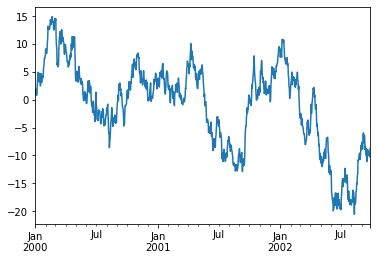

In [120]:
ts.plot()

In [121]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

In [122]:
df = df.cumsum()

使用`plt`绘图，具体参数设置可以查阅matplotlib官方文档

<Figure size 432x288 with 0 Axes>

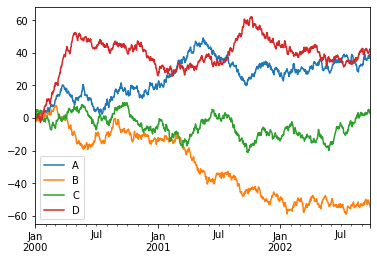

In [123]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 导入导出数据

**将数据写入`csv`，如果有中文需要注意编码**

In [124]:
# df.to_csv('foo.csv')

从`csv`中读取数据

In [125]:
# pd.read_csv('foo.csv').head()

将数据导出为`hdf`格式

In [126]:
# df.to_hdf('foo.h5','df')

从`hdf`文件中读取数据前五行

In [127]:
# pd.read_hdf('foo.h5','df').head()

将数据保存为`xlsx`格式

In [128]:
# df.to_excel('foo.xlsx', sheet_name='Sheet1')

从`xlsx`格式中按照指定要求读取sheet1中数据

In [129]:
# pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()